In [18]:
#creating the  model

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model

In [34]:

from keras.regularizers import l2
input = layers.Input(shape=(150,150,3))

x = layers.Conv2D(16,3,activation='relu')(input)
x = layers.MaxPooling2D()(x)


x = layers.Conv2D(32,3,activation='relu')(x)
x = layers.MaxPooling2D()(x)


x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.MaxPooling2D()(x)


x= layers.Flatten()(x)

x = layers.Dense(512,activation='relu')(x)

x= layers.Dropout(0.2)(x)

output = layers.Dense(2,activation='softmax')(x)


In [35]:
model = Model(input,output)

In [36]:
model.summary()


Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)       

In [37]:
from keras.optimizers import SGD

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = "categorical_crossentropy", optimizer=opt,
              metrics=['acc'])

In [23]:
# data preprocessing

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-09-05 06:12:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   149MB/s    in 0.4s    

2020-09-05 06:12:45 (149 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [24]:
import os
import zipfile

path = '/tmp/cats_and_dogs_filtered.zip'
unzip = zipfile.ZipFile(path,'r')
unzip.extractall('/tmp')
unzip.close()



In [25]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')

train_cat = os.path.join(train_dir ,'cats')
train_dog = os.path.join(train_dir,'dogs')

test_cat = os.path.join(val_dir,'cats')
test_dog = os.path.join(val_dir,'dogs')

print('no of train cats',len(os.listdir(train_cat)))

print('no of train dogs',len(os.listdir(train_dog)))

print('no of test cats',len(os.listdir(test_cat)))

print('no of test dogss',len(os.listdir(test_dog)))

no of train cats 1000
no of train dogs 1000
no of test cats 500
no of test dogss 500


In [39]:



from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_data = ImageDataGenerator( rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_data =  ImageDataGenerator(rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255  ,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'            
   )

train_datas = train_data.flow_from_directory(
    train_dir,
    batch_size =20,
    target_size=(150, 150),
    class_mode = 'categorical'
)

test_datas = test_data.flow_from_directory(
    val_dir,
    batch_size =20,
    target_size=(150, 150),
    class_mode = 'categorical'
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:

training = model.fit_generator(train_datas,
      steps_per_epoch=100,  
      epochs=15,
      validation_data=test_datas,
      validation_steps=50)

Epoch 1/15
100/100 [==============================] - 66s 660ms/step - loss: 0.6509 - acc: 0.6045 - val_loss: 0.6719 - val_acc: 0.5940
Epoch 2/15
100/100 [==============================] - 65s 653ms/step - loss: 0.6350 - acc: 0.6260 - val_loss: 0.6212 - val_acc: 0.6630
Epoch 3/15
100/100 [==============================] - 65s 655ms/step - loss: 0.6208 - acc: 0.6685 - val_loss: 0.6223 - val_acc: 0.6620
Epoch 4/15
100/100 [==============================] - 65s 652ms/step - loss: 0.6015 - acc: 0.6785 - val_loss: 0.6074 - val_acc: 0.6750
Epoch 5/15
100/100 [==============================] - 65s 653ms/step - loss: 0.5995 - acc: 0.6765 - val_loss: 0.6139 - val_acc: 0.6520
Epoch 6/15
100/100 [==============================] - 66s 656ms/step - loss: 0.5885 - acc: 0.7035 - val_loss: 0.5911 - val_acc: 0.6840
Epoch 7/15
100/100 [==============================] - 66s 655ms/step - loss: 0.5810 - acc: 0.6940 - val_loss: 0.5816 - val_acc: 0.6970
Epoch 8/15
100/100 [==============================] - 6

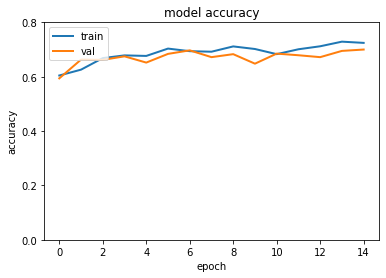

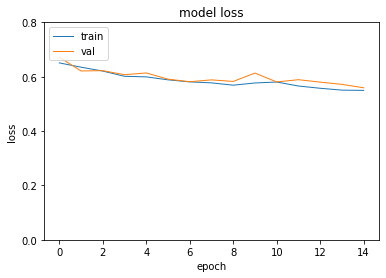

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(training.history['acc'],linewidth=2)
plt.plot(training.history['val_acc'],linewidth=2)
plt.yticks(np.arange(0.0, 1.0, step=0.2))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(training.history['loss'],linewidth=1)
plt.plot(training.history['val_loss'],linewidth=1)
#plt.yticks(np.arange(y.min(), y.max(), 0.05))
plt.yticks(np.arange(0.0, 1.0, step=0.2))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

[[1. 0.]]


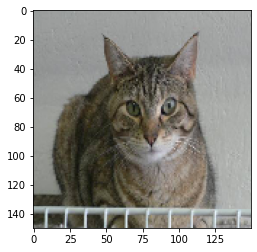

In [45]:
import numpy as np
from keras.preprocessing import image



img_pred1 = image.load_img('/tmp/cats_and_dogs_filtered/train/cats/cat.103.jpg', target_size = (150, 150))

img_pred = image.load_img('/tmp/cats_and_dogs_filtered/train/cats/cat.103.jpg', target_size = (150, 150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = model.predict(img_pred)

plt.imshow(img_pred1)

#ind = training_set.class_indices

#x=Path('/tmp/cats_and_dogs_filtered/train/cats/cat.103.jpg')
#image = io.imread(x)
#image = skimage.img_as_float(image)
img=image.load_img('/tmp/cats_and_dogs_filtered/train/cats/cat.103.jpg',target_size=(150,150,3))
img=image.img_to_array(img)
img=img.reshape((1,150,150,3))
img.shape

print(model.predict(img))

activations =model.predict(img)

16
conv2d_9 (3, 3, 3, 16)


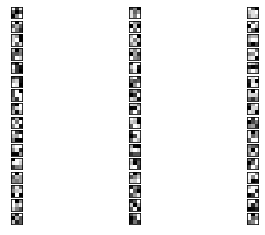

32
conv2d_10 (3, 3, 16, 32)


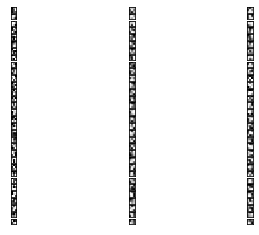

64
conv2d_11 (3, 3, 32, 64)


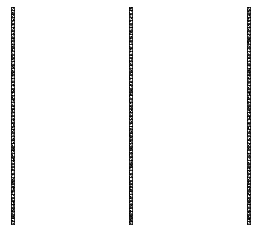

In [46]:
# FILTER VISUALISATION #
import matplotlib.pyplot as plt

for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        print(layer.name, filters.shape)
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
          
            #plotting each of the channel, color image RGB channels
            
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j],cmap='Greys')
                filter_cnt+=1
        plt.show()

input_4


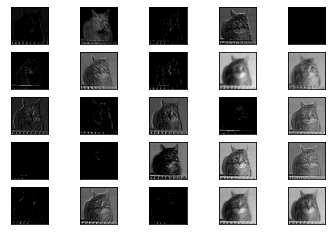

conv2d_9


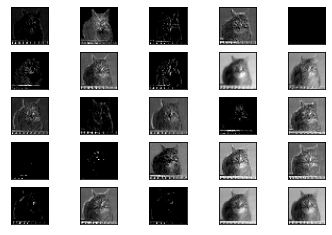

max_pooling2d_9


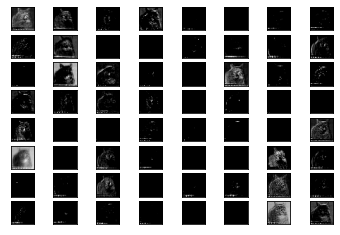

In [47]:
# FEATURE MAP VISUALISATION #

from tensorflow.keras import Model
from keras.preprocessing import image
from pathlib import Path
from matplotlib import pyplot
import math
ixs = [2,3,4]
outputs = [model.layers[i+1].output for i in ixs]
featuremodel = Model(inputs=model.inputs, outputs=outputs)
layer_names = [layer.name for layer in model.layers]

x=Path('/tmp/cats_and_dogs_filtered/train/cats/cat.103.jpg')
#image = io.imread(x)
#image = skimage.img_as_float(image)
img=image.load_img(x,target_size=(150,150,3))
img=image.img_to_array(img)
img=img.reshape((1,150,150,3))
featuremaps=featuremodel.predict(img)
  # number of features in the feature map
#size  = feature_map.shape[ 1]
for fmap,layer_name in zip(featuremaps,layer_names):
  ix = 1
  n_features = fmap.shape[-1]
  square = int(math.sqrt(n_features))
  print(layer_name)
  for _ in range(square):
    
    for _ in range(square):
			# specify subplot and turn of axis
      ax = pyplot.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
			# plot filter channel in grayscale
      pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
      ix += 1
	# show the figure
  pyplot.show()